In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

from statannotations.Annotator import Annotator

import json

In [30]:
plt.rcParams["font.family"] = "Times New Roman"
sns.set(rc={'text.usetex' : True})
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [2]:
cartography_df = pd.read_csv('./results/full_cartography.csv')
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
0,0,27,people be shooting their guns around here late...,0.468335,0.254122,0.461694,0.531665,0.254122,0.538306,0,...,0.468335,0.254122,0.461694,False,0,1.000000,1.0,False,0.634558,0.371043
1,18,27,people be shooting their guns around here late...,0.673583,0.149176,0.843622,0.326417,0.149176,0.156378,0,...,0.673583,0.149176,0.843622,True,0,1.000000,1.0,False,0.634558,0.371043
2,19,27,people be shooting their guns around here late...,0.598873,0.250696,0.965319,0.401127,0.250696,0.034681,0,...,0.598873,0.250696,0.965319,True,0,1.000000,1.0,False,0.634558,0.371043
3,0,245,S/o to dat bitch ass nigga in Alabama who wann...,0.432531,0.089234,0.475542,0.567469,0.089234,0.524458,0,...,0.432531,0.089234,0.475542,False,1,0.666667,0.8,True,0.854028,0.090836
4,44,245,S/o to dat bitch ass nigga in Alabama who wann...,0.472632,0.200629,0.205699,0.527368,0.200629,0.794301,1,...,0.527368,0.200629,0.794301,True,1,0.666667,0.8,False,0.854028,0.090836


In [3]:
cartography_df.groupby(['Mindex']).size()

Mindex
1        3
4        3
5        2
6        2
7        3
        ..
45311    1
45312    3
45314    3
45316    1
45317    3
Length: 27231, dtype: int64

In [4]:
both_votes_df = cartography_df[cartography_df['agreement_factor'] < 1.0].copy()
both_votes_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
3,0,245,S/o to dat bitch ass nigga in Alabama who wann...,0.432531,0.089234,0.475542,0.567469,0.089234,0.524458,0,...,0.432531,0.089234,0.475542,False,1,0.666667,0.8,True,0.854028,0.090836
4,44,245,S/o to dat bitch ass nigga in Alabama who wann...,0.472632,0.200629,0.205699,0.527368,0.200629,0.794301,1,...,0.527368,0.200629,0.794301,True,1,0.666667,0.8,False,0.854028,0.090836
5,57,245,S/o to dat bitch ass nigga in Alabama who wann...,0.368366,0.151878,0.343379,0.631634,0.151878,0.656621,1,...,0.631634,0.151878,0.656621,True,1,0.666667,0.8,False,0.854028,0.090836
6,0,404,RT @NerdAtCoolTable: Any chick that gets In a ...,0.324292,0.095758,0.418641,0.675708,0.095758,0.581359,1,...,0.675708,0.095758,0.581359,True,1,0.666667,0.8,False,0.826462,0.217120
7,39,404,RT @NerdAtCoolTable: Any chick that gets In a ...,0.594642,0.098114,0.547529,0.405358,0.098114,0.452471,0,...,0.594642,0.098114,0.547529,True,1,0.666667,0.8,True,0.826462,0.217120


In [5]:
cartography_df['Mindex'].nunique()

27231

In [6]:
both_votes_df[both_votes_df['Mindex'] == 679][['confidence', 'text', 'Aindex', 'pred', 'label']].values

array([[0.7451552867889404,
        'At the MLK march tryna find a man bitch we see U', 9, 1, 1],
       [0.6453444361686707,
        'At the MLK march tryna find a man bitch we see U', 55, 0, 0],
       [0.4927133440971374,
        'At the MLK march tryna find a man bitch we see U', 58, 1, 0]],
      dtype=object)

In [7]:
both_votes_df[both_votes_df['Aindex'] == 0][['confidence', 'text', 'pred', 'label']].values

array([[0.4325306832790375,
        'S/o to dat bitch ass nigga in Alabama who wanna kill me #GoodLucc',
        1, 0],
       [0.6757081985473633,
        'RT @NerdAtCoolTable: Any chick that gets In a fight after the age 24 is a hoe',
        1, 1],
       [0.5815780520439148,
        'RT @iDntWearCondoms: If your girl see that another girl likes you, her name is "this bitch" until further notice.',
        0, 0],
       [0.4629585146903991,
        '"@PRAYINGFORHEAD: &#8220;@macklemroe: Stop bringing weird niggers into my mentions! @PRAYINGFORHEAD&#8221; http://t.co/cussDJesRK"',
        0, 1],
       [0.8293987274169922,
        'Dumb bitches that think Buddha says namaste', 1, 1],
       [0.3276289016008377,
        'Yandy gotta pay me for dick im sorry...that bitch ugly', 1, 0],
       [0.3012238472700118, 'Wut a bitch', 1, 0],
       [0.6378005027770997,
        '"I used to dress up like a cop too."\n"Oh really?"\n"Yeah...right after 9/11...mad pussy."\n"Really?"\n"Yes...I\'ll N

In [8]:
grouped_data_label = both_votes_df.groupby(['Mindex', 'label']).agg({'confidence': 'mean'}).reset_index()
grouped_data_label = grouped_data_label.pivot(index='Mindex', columns='label', values='confidence').reset_index()
grouped_data_label.rename(columns={0: 'label_0', 1: 'label_1', 'label': 'index'}, inplace=True)
grouped_data_label.head()

label,Mindex,label_0,label_1
0,7,0.345700,0.836047
1,8,0.238775,0.760268
2,16,0.516981,0.595758
3,18,0.809001,0.360159
4,30,0.299280,0.531855


In [9]:
count_column = both_votes_df.groupby('Mindex').size().reset_index(name='count')
grouped_data_label = grouped_data_label.merge(count_column, on='Mindex')

In [10]:
grouped_data_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486 entries, 0 to 6485
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mindex   6486 non-null   int64  
 1   label_0  6486 non-null   float64
 2   label_1  6486 non-null   float64
 3   count    6486 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 253.4 KB


In [11]:
both_mindex_values = grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] > 0.5)]['Mindex'].values
only_0_mindex_values = grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] <= 0.5)]['Mindex'].values
only_1_mindex_values = grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] > 0.5)]['Mindex'].values
none_mindex_values = grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] <= 0.5)]['Mindex'].values

grouped_data_label['group'] = 0
grouped_data_label.loc[grouped_data_label['Mindex'].isin(both_mindex_values), 'group'] = 'All Labels > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(only_0_mindex_values), 'group'] = '1 Label > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(only_1_mindex_values), 'group'] = '1 Label > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(none_mindex_values), 'group'] = '0 Labels > 0.5'

In [12]:
grouped_data_label.tail()

,Mindex,label_0,label_1,count,group
6481,45285,0.799048,0.382788,3,1 Label > 0.5
6482,45292,0.748950,0.618096,3,All Labels > 0.5
6483,45294,0.595958,0.820468,3,All Labels > 0.5
6484,45301,0.864831,0.437305,3,1 Label > 0.5
6485,45312,0.960800,0.021678,3,1 Label > 0.5


<Axes: xlabel='group', ylabel='count'>

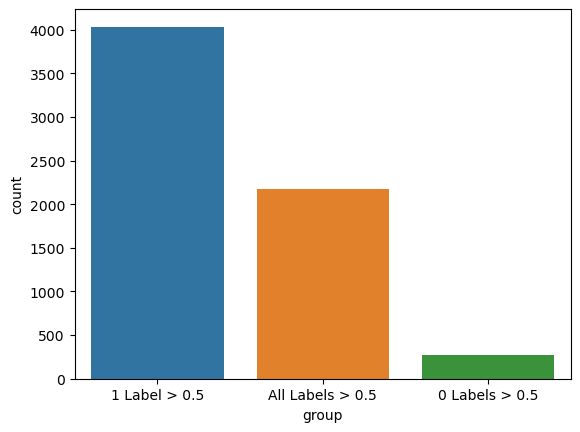

In [13]:
sns.countplot(x=grouped_data_label['group'], order=grouped_data_label['group'].value_counts().index)

In [14]:
grouped_data_label[(grouped_data_label['group']=='only_1_greater') & (grouped_data_label['count']< 10)]['count'].mean()

nan

# Final plotting

In [15]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not offensive', 1: 'offensive'})

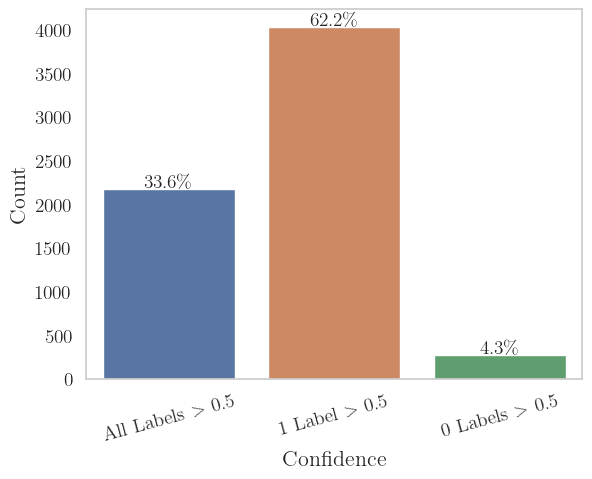

In [38]:
ax = sns.countplot(x=grouped_data_label['group'], order=['All Labels > 0.5', '1 Label > 0.5', '0 Labels > 0.5'])
ax.grid(False)

# plt.title('Confidence of Samples with Disagreement in Label', fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=16)
plt.gca().set_xlabel('Confidence', fontsize=16)

plt.yticks(fontsize=14)

plt.xticks([0, 1, 2], [r'All Labels \textgreater \ 0.5', r'1 Label \textgreater \ 0.5', r'0 Labels \textgreater \ 0.5'], fontsize=14, rotation=15)

total = grouped_data_label["group"].value_counts().sum()  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}\%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20  # Adjust the vertical position of the label
    ax.text(x, y, percentage, ha="center", fontsize=14)
    
plt.savefig("./plots/disco/sbic_group_count.pdf", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.374e+08


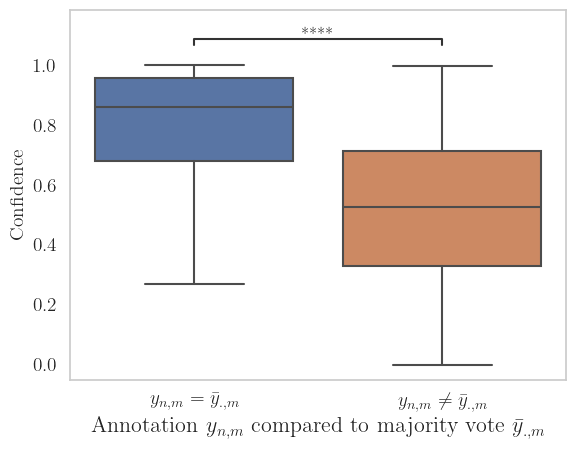

In [33]:
ax = sns.boxplot(data=cartography_df, x="disagrees_with_majority", y="confidence", showfliers=False)

pairs=[ (False, True)]


annotator = Annotator(ax, pairs, data=cartography_df, x="disagrees_with_majority", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()


# plt.title('Samples with low confidence (<0.5) in Single-GL model', fontsize=16)
plt.xticks([0, 1], [r'$y_{n,m} = \bar{{y}}_{.,m}$', r'$y_{n,m} \neq \bar{{y}}_{.,m}$'], fontsize=14)

ax.grid(False)

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel(r"Annotation $y_{n,m}$ compared to majority vote $\bar{{y}}_{.,m}$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("./plots/disco/sbic_disagree_vs_conf.pdf", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.374e+08


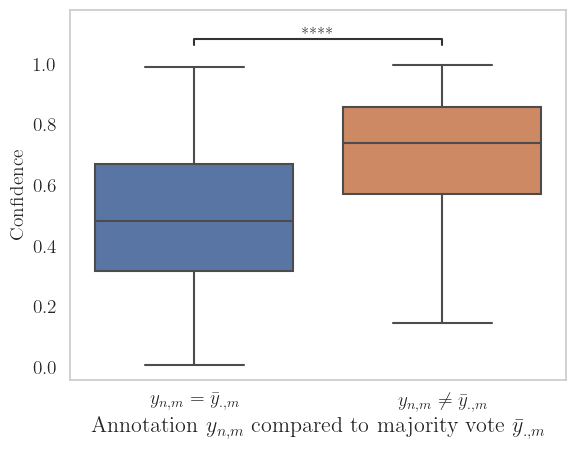

In [34]:
ax = sns.boxplot(data=cartography_df[cartography_df['majority_confidence']<0.5], x="disagrees_with_majority", y="confidence", showfliers=False)

pairs=[ (False, True)]


annotator = Annotator(ax, pairs, data=cartography_df, x="disagrees_with_majority", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

# plt.title('Samples with low confidence (<0.5) in Single-GL model', fontsize=16)
plt.xticks([0, 1], [r'$y_{n,m} = \bar{{y}}_{.,m}$', r'$y_{n,m} \neq \bar{{y}}_{.,m}$'], fontsize=14)

ax.grid(False)

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel(r"Annotation $y_{n,m}$ compared to majority vote $\bar{{y}}_{.,m}$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("./plots/disco/sbic_low_conf_mjr_disagree_vs_conf.pdf", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:2.873e-02 U_stat=7.117e+06
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.020e+08
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.688e-182 U_stat=8.644e+06


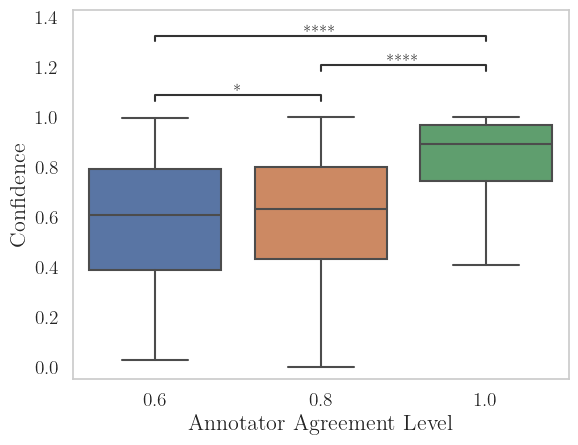

In [36]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)


pairs=[(0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=16)
plt.gca().set_xlabel('Annotator Agreement Level', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.grid(False)
# plt.legend(title = 'Label', loc='lower right')
plt.savefig("./plots/disco/sbic_agr_factor_vs_conf.pdf", dpi=600, bbox_inches='tight')

In [21]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.4363909769178712, pvalue=0.0)

In [22]:
max_conf_df = cartography_df.groupby('Mindex').agg({'confidence': 'max', 'majority_confidence': 'first'})
max_conf_df.head()

,confidence,majority_confidence
Mindex,,
1,0.951058,0.974269
4,0.831342,0.581928
5,0.875403,0.741554
6,0.961300,0.914978
7,0.903952,0.904037


/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

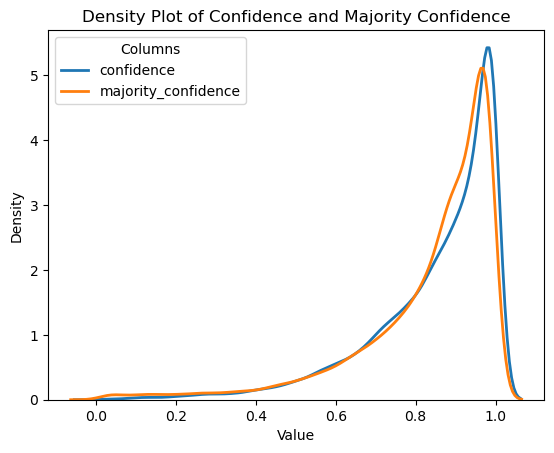

In [23]:
sns.distplot(max_conf_df['confidence'], hist = False, kde = True, kde_kws = {'linewidth': 2}, label = 'confidence')
sns.distplot(max_conf_df['majority_confidence'], hist = False, kde = True, kde_kws = {'linewidth': 2}, label = 'majority_confidence')
plt.legend(prop={'size': 10}, title = 'Columns')
plt.title('Density Plot of Confidence and Majority Confidence')
plt.xlabel('Value')
plt.ylabel('Density')

In [39]:
labels_no_conf_indices = grouped_data_label[grouped_data_label['group']=='0 Labels > 0.5']['Mindex'].values

In [45]:
cartography_df[cartography_df['Mindex'].isin(labels_no_conf_indices)][['Aindex',	'Mindex',	'text', 'label', 'majority_label', 'confidence', 'majority_confidence', 'majority_variability']].head(10)

,Aindex,Mindex,text,label,majority_label,confidence,majority_confidence,majority_variability
12,0,1389,RT @iDntWearCondoms: If your girl see that ano...,0,0,0.581578,0.588240,0.361331
13,17,1389,RT @iDntWearCondoms: If your girl see that ano...,1,0,0.470207,0.588240,0.361331
14,23,1389,RT @iDntWearCondoms: If your girl see that ano...,0,0,0.412134,0.588240,0.361331
21,0,1887,Yandy gotta pay me for dick im sorry...that bi...,0,1,0.327629,0.859266,0.138946
22,2,1887,Yandy gotta pay me for dick im sorry...that bi...,1,1,0.523414,0.859266,0.138946
23,10,1887,Yandy gotta pay me for dick im sorry...that bi...,1,1,0.350761,0.859266,0.138946
176,0,14098,This is a black hypothesis Edit: my hypothesis...,0,0,0.514752,0.826357,0.201141
177,43,14098,This is a black hypothesis Edit: my hypothesis...,0,0,0.251480,0.826357,0.201141
178,61,14098,This is a black hypothesis Edit: my hypothesis...,1,0,0.361348,0.826357,0.201141
247,0,20306,What do we call a sportscar on the wrong side ...,1,0,0.316660,0.714542,0.319005


In [47]:
cartography_df[cartography_df['Aindex'] == 10]['label'].value_counts()

0    1006
1     445
Name: label, dtype: int64

In [42]:
cartography_df[cartography_df['Aindex'] == 106]['label'].value_counts()

0    168
1     50
Name: label, dtype: int64